<a href="https://colab.research.google.com/github/vsanglik/ai/blob/main/ML_01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refering to [Copy of Intro_to_ML_workflow_MS] https://colab.research.google.com/drive/1i3cOMawdOCBBJQpd4FyLnuzbDbVvMvao

# Data Preprocessing

In [ ]:
# import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# load iris dataset
iris = load_iris()

# print feature names and target labels
print("Feature Names: ", iris.feature_names)
print("Target names: ", iris.target_names)

# Split data into train and test set (70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']


# Data Analysis

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


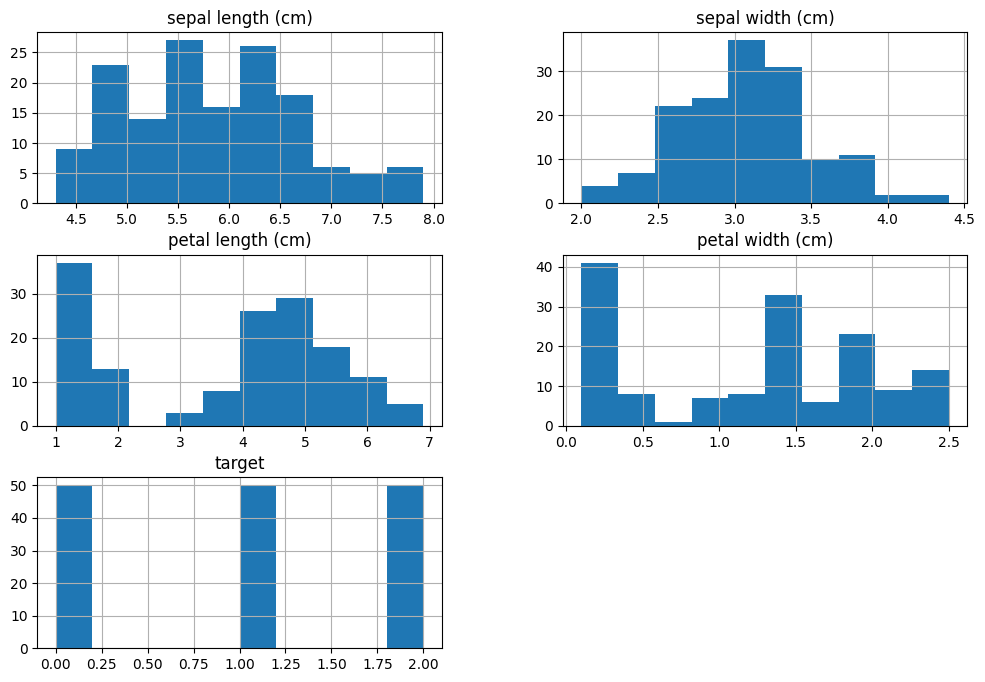

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

print(df.describe())

# Visualize data distribution on histogram
df.hist(figsize=(12,8))
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.title("Distribution of isris flower features")
plt.show()

#Model Training
We will train a K-Nearest Neighbours (KNN) classifier for simplicity

In [ ]:
# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier # from sklearn library we are importing KNeighboursClassifier

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5) # n_neighbours is a hyper parameter
knn.fit(X_train, y_train) # fit means train the model

KNeighborsClassifier()

#Model Evaluation

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

#Save Model

In [ ]:
import pickle

with open("knn_model.pkl", "wb") as f:
  pickle.dump(knn, f)

#Deploy Model

In [ ]:
!pip install flask-ngrok

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
#from flask_ngrok import run_with_ngrok
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))

app = Flask(__name__)
#run_with_ngrok(app)

with open("knn_model.pkl", "rb") as f:
  model = pickle.load(f)

@app.route("/")
def Home():
  return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
  float_features = [float(x) for x in request.form.values()]
  features = [np.array(float_features)]
  prediction = model.predict(features)

  return render_template("index.html", prediction_text = "The flower species is : {}".format(prediction))

if __name__ == "__main__":
  app.run(debug=True, use_reloader=False)
  #app.run()

#import threading
#threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':80}).start()


172.28.0.12
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
from flask import Flask, request, jsonify, render_template

app = Flask(__name__)

@app.route("/")
def Home():
  return ("Hello World !")

if __name__ == "__main__":
  app.run(debug=True, use_reloader=False)

#import threading
#threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':81}).start()


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
